In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from reservoirpy.wellproductivitypy import pi

In [2]:
pumps = pd.read_csv('esp_pumps.csv').head()
print(pumps.columns)
print(pumps)


Index(['RowId', 'Manufacter', 'Series', 'Model', 'MinCsg', 'RefFreq', 'RefStg',
       'Min', 'BEP', 'Max', 'AOF', 'H0', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6',
       'P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6'],
      dtype='object')
   RowId Manufacter  Series     Model  MinCsg  RefFreq  RefStg  Min     BEP  \
0      1    Example     400   4.0-330     4.5       60       1  216   420.0   
1      2    Example     400   4.0-450     4.5       60       1  350   480.0   
2      3    Example     400   4.0-650     4.5       60       1  415   680.0   
3      4    Example     400   4.0-850     4.5       60       1  640   975.0   
4      5    Example     400  4.0-1200     4.5       60       1  695  1200.0   

    Max  ...            H4            H5   H6        P0        P1  \
0   555  ... -1.004130e-09  6.033100e-13  0.0  0.106094  0.000638   
1   550  ...  3.875440e-10 -3.645220e-13  0.0  0.103700 -0.000170   
2   867  ...  1.891660e-10 -5.526570e-14  0.0  0.138996 -0.000059   
3  1200  ... -2.0521

In [3]:
pumps_dict = {}

for i,r in pumps.iterrows():
    esp = pi.Esp(
        name = r['Model'],
        series = r['Series'],
        min_csg = r['Min'],
        min_flow = r['Min'],
        max_flow = r['Max'],
        bep = r['BEP'],
        aof = r['AOF'],
        head_coef = r[['H6','H5','H4','H3','H2','H1','H0']].tolist(),
        power_coef = r[['P6','P5','P4','P3','P2','P1','P0']].tolist(),
        ref_stage = r['RefStg'],
        ref_freq = r['RefFreq'],
        n= 20
    )
    
    pumps_dict[r['Model']] = esp

In [8]:
freqs = np.linspace(30,60,3)
stages = 1


heads = pumps_dict['4.0-1200'].head(freq=freqs, stages=stages)
print(heads.columns)

power = pumps_dict['4.0-1200'].power(freq=freqs, stages=stages)
print(power.columns)

bounds = pumps_dict['4.0-1200'].operation_range(freq=freqs, stages=stages)
print(bounds.columns)

Index(['head', 'frecuency', 'stages'], dtype='object')
Index(['power', 'efficiency', 'frecuency', 'stages'], dtype='object')
Index(['capacity', 'head', 'bound'], dtype='object')


<AxesSubplot:xlabel='capacity', ylabel='efficiency'>

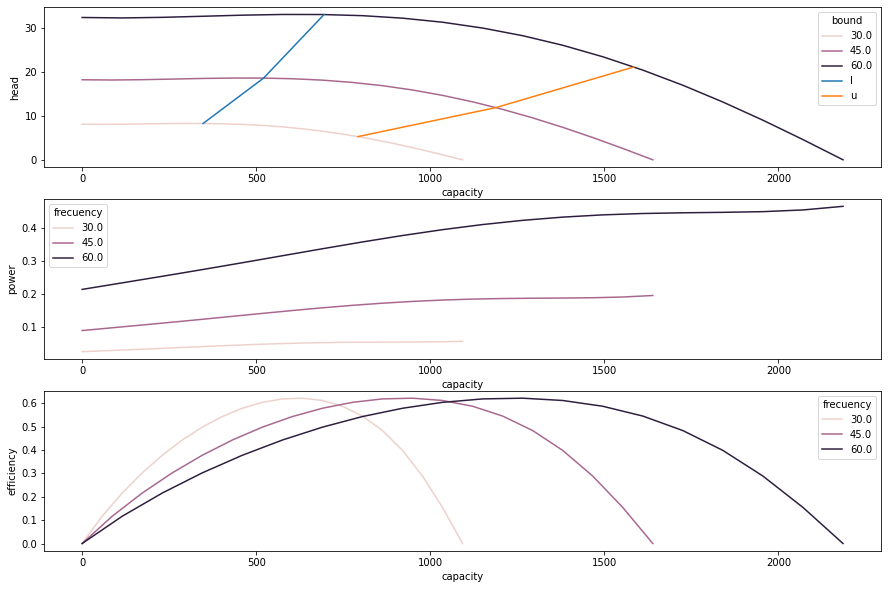

In [9]:
fig, ax = plt.subplots(3,1,figsize=(15,10))

sns.lineplot(data=heads, x=heads.index, y='head', hue='frecuency',ax=ax[0])
sns.lineplot(data=bounds, x='capacity', y='head', hue='bound',ax=ax[0])
sns.lineplot(data=power, x=power.index, y='power', hue='frecuency',ax=ax[1])
sns.lineplot(data=power, x=power.index, y='efficiency', hue='frecuency',ax=ax[2])